## Examples of using the Mondrian forest and tree classifiers.

In [1]:
include("Mondrian_Forest_Classifier.jl")

show_mondrian_split_2d

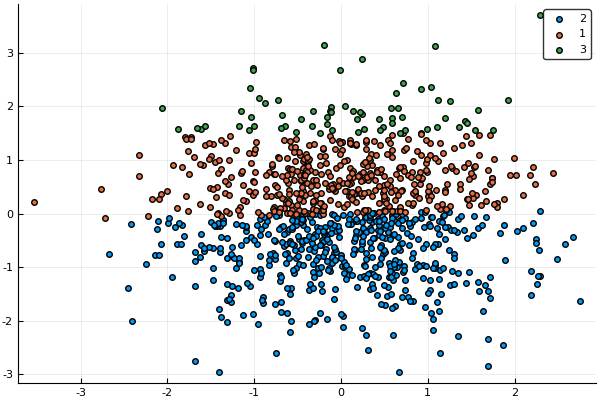

In [21]:
using MLBase
using Plots

function Fakedata3Classif(N,d,N_test=0)
    X = randn((N,d))
    param1 = randn(d)
    param2 = randn(d)
    Y = ( sum(X*param1,2) .> mean(sum(X*param2,2)) )
    Y=convert(Array{Int},Y)
    for i in 1:size(X,1)
        if X[i,2] > 1.5
            Y[i] = 2
        end
    end
    if (N_test > 0)
        x = randn((N_test,d))
        y = ( sum(x*param1,2) .> mean(sum(x*param2,2)) )
        y=convert(Array{Int},y)
        for i in 1:size(x,1)
            if x[i,2] > 1.5
                y[i] = 2
            end
        end
        return X,Y,x,y
    end
    return X,Y
end

X, Y, x, y = Fakedata3Classif(1000,2,1000);
Y = Y.+1;
y = y.+1;

if size(X,2)==2
    plot()
    for class in unique(Y)
        scatter!(X[Y.==class,1],X[Y.==class,2],label="$class")
    end
    plot!()
end

## Mondrian tree classifier

In [25]:
# initialise a mondreian tree classifier object with an empty tree
# and empty data. NB the underlying mondrian tree can be accessed by MT.Tree (see visualisation)
MT = Mondrian_Tree_Classifier()
# trains the tree and sets MT.X and MT.Y to the given training data
train!(MT,X,Y,1e9)

# predict on training and testing
pred=predict!(MT, X)
println("Train Accuracy")
println(correctrate(Y,convert(Array{Int,1},pred)))
pred=predict!(MT, x)
println("Accuracy") 
println(correctrate(y,convert(Array{Int,1},pred)))

# give the raw probs
predict_proba!(MT,x[1:10,:])

Train Accuracy
0.911
Accuracy
0.917


10-element Array{Any,1}:
 [1.0, 0.0, 0.0]          
 [1.0, 0.0, 0.0]          
 [1.0, 0.0, 0.0]          
 [0.0, 1.0, 0.0]          
 [0.0, 1.0, 0.0]          
 [0.866667, 0.0, 0.133333]
 [0.0, 1.0, 0.0]          
 [1.0, 0.0, 0.0]          
 [0.0, 1.0, 0.0]          
 [0.0, 1.0, 0.0]          

In [14]:
# repl output
MT

Mondrian Tree Classifier:
    Mondrian Tree with 10 leaves

In [15]:
# the data has been added
println(MT.X[1:10,:])
println(MT.Y[1:10])

[0.653905 1.51188; 0.268447 -0.554094; 0.924698 0.0250108; 1.29461 -0.0724787; -0.288986 0.385315; 0.115692 -0.177784; -0.0259562 -0.832072; 1.52393 -0.382439; -0.235283 -0.581751; -0.385522 -0.317392]
[2, 1, 2, 2, 2, 1, 1, 2, 1, 1]


## Visualisation

Based on DecisionTree.jl print_tree function. TODO draw with Graphs.jl

In [17]:
MT = Mondrian_Tree_Classifier()
# low λ value to show the plotting
train!(MT,X,Y,0.2)
pred=predict!(MT, X)
println("Train Accuracy")
println(correctrate(Y,convert(Array{Int,1},pred)))

# print the text based vis
print_mondrian_tree(get(MT.Tree.root))

Train Accuracy
0.649
τ: 0.016
L-> τ: 0.032
    L-> τ: 0.097
        L-> τ: 0.107
            L-> Prediction: [0.624, 0.376]
            R-> τ: 0.199
                L-> Prediction: [0.064, 0.936]
                R-> Prediction: [0.201, 0.799]
        R-> τ: 0.121
            L-> Prediction: [0.5, 0.5]
            R-> Prediction: [0.524, 0.476]
    R-> τ: 0.038
        L-> Prediction: [0.872, 0.128]
        R-> τ: 0.095
            L-> Prediction: [0.1, 0.9]
            R-> τ: 0.175
                L-> τ: 0.183
                    L-> τ: 0.196
                        L-> Prediction: [0.06, 0.94]
                        R-> Prediction: [0.415, 0.585]
                    R-> Prediction: [0.909, 0.091]
                R-> Prediction: [0.479, 0.521]
R-> Prediction: [1.0, 0.0]


### The splits can be visualised for an individual Mondrian_Tree_Classifier

Here a plot and animation are returned, plot is the final still. If animation=false
then a one frame animation and plot are returned (both the final plot).

In [18]:
X, Y, x, y = FakedataClassif(100,2,25);
Y = Y.+1;
y = y.+1;

MT = Mondrian_Tree_Classifier()
train!(MT,X,Y,1e6)
pred=predict!(MT, X)
println("Train Accuracy")
println(correctrate(Y,convert(Array{Int,1},pred)))

# plots the splits for a Mondrian_Tree_Classifier in 2_d could do
# higher d but would only plot dimension 1,2
f,a = show_mondrian_split_2d(MT,Data=true,animation=true);
gif(a,"resources/MT.gif",fps=1)

Train Accuracy
0.93


INFO: Saved animation to /home/harvey/Group Project/warwick-rsg/MondrianForest/resources/MT.gif


Plots.AnimatedGif("/home/harvey/Group Project/warwick-rsg/MondrianForest/resources/MT.gif")

# Mondrian Forest classifier

Python has $\sim 27 - 33$ seconds runtime, $\sim 276-619$ MiB of memory allocations, and about $0.8-0.92$ accuracy on an
equivalent problem

See [python comparison](comparisons/python_comp.ipynb) and the plots below. S


![alt text](comparisons/n_tree_scale.png)

Yet to update data scale with paused mondrians and parallel training

![alt text](comparisons/n_data_scale.png)

In [8]:
X, Y, x, y = FakedataClassif(5000,5,1000);
Y = Y.+1;
y = y.+1;

# creates a mondrian forest classifier with 100 mondrian tree classifiers
MF = Mondrian_Forest_Classifier(50)
# time and memory separately
tic()
train!(MF, X, Y, 1e9)
toc()
# prediction is greatest time hog
tic()
pred=predict!(MF, X);
toc()
println("Train Accuracy")
println(correctrate(Y,convert(Array{Int,1},pred)))
pred=predict!(MF, x)
println("Accuracy") 
println(correctrate(y,convert(Array{Int,1},pred)))

MF = Mondrian_Forest_Classifier(50)
println("Allocations: ", @allocated(train!(MF,X,Y,1e9))/1e6, " Mb")

elapsed time: 0.365597964 seconds

elapsed time: 1.684330141 seconds
Train Accuracy
0.982

Accuracy
0.937
Allocations: 0.002416 Mb


In [10]:
predict_proba!(MF,x[1:10,:])

10-element Array{Array{Float64,1},1}:
 [0.354276, 0.645724] 
 [0.922847, 0.077153] 
 [0.813507, 0.186493] 
 [0.924811, 0.0751885]
 [0.922847, 0.077153] 
 [0.725272, 0.274728] 
 [0.39959, 0.60041]   
 [0.922847, 0.077153] 
 [0.845752, 0.154248] 
 [0.924811, 0.0751885]

In [19]:
# repl output
MF

Mondrian Forest Classifier with 512 Mondrian trees:
    Mondrian Tree with 73 leaves
    Mondrian Tree with 66 leaves
    Mondrian Tree with 30 leaves
    Mondrian Tree with 30 leaves
    Mondrian Tree with 100 leaves
    Mondrian Tree with 101 leaves
    Mondrian Tree with 114 leaves
    Mondrian Tree with 56 leaves
    Mondrian Tree with 64 leaves
    Mondrian Tree with 88 leaves
    Mondrian Tree with 122 leaves
    Mondrian Tree with 100 leaves
    Mondrian Tree with 58 leaves
    Mondrian Tree with 81 leaves
    Mondrian Tree with 9 leaves
    Mondrian Tree with 18 leaves
    Mondrian Tree with 163 leaves
    Mondrian Tree with 126 leaves
    Mondrian Tree with 68 leaves
    Mondrian Tree with 41 leaves
    Mondrian Tree with 35 leaves
    Mondrian Tree with 7 leaves
    Mondrian Tree with 119 leaves
    Mondrian Tree with 102 leaves
    Mondrian Tree with 118 leaves
    Mondrian Tree with 58 leaves
    Mondrian Tree with 30 leaves
    Mondrian Tree with 58 leaves
    Mondrian Tre

    Mondrian Tree with 25 leaves
    Mondrian Tree with 16 leaves
    Mondrian Tree with 78 leaves
    Mondrian Tree with 90 leaves
    Mondrian Tree with 22 leaves
    Mondrian Tree with 66 leaves
    Mondrian Tree with 46 leaves
    Mondrian Tree with 74 leaves
    Mondrian Tree with 7 leaves
    Mondrian Tree with 73 leaves
    Mondrian Tree with 103 leaves
    Mondrian Tree with 85 leaves
    Mondrian Tree with 133 leaves
    Mondrian Tree with 54 leaves
    Mondrian Tree with 45 leaves
    Mondrian Tree with 68 leaves
    Mondrian Tree with 15 leaves
    Mondrian Tree with 27 leaves
    Mondrian Tree with 27 leaves
    Mondrian Tree with 103 leaves
    Mondrian Tree with 40 leaves
    Mondrian Tree with 42 leaves
    Mondrian Tree with 6 leaves
    Mondrian Tree with 57 leaves
    Mondrian Tree with 68 leaves
    Mondrian Tree with 120 leaves
    Mondrian Tree with 66 leaves
    Mondrian Tree with 35 leaves
    Mondrian Tree with 8 leaves
    Mondrian Tree with 84 leaves
    Mondr

# MLBase Gridtune

Something is wrong here

In [20]:
d=2
X, Y, x, y = FakedataClassif(1000,d,100);
Y = Y.+1;
y = y.+1;

# Currently adding @parallel to the for loop in train! causes
# train! within MLBase's gridtune to be unable to modify the
# Mondrian_Forest_Classfier Trees array....
function train_for_mlbase!(MF::Mondrian_Forest_Classifier,
                X::Array{Float64,2},
                Y::Array{Int64},
                λ::Float64=1e9)

    for i in 1:MF.n_trees
        MT = Mondrian_Tree_Classifier()
        train!(MT, X, Y, λ)
        push!(MF.Trees,MT)
    end
    MF.X = X
    MF.Y = Y
end

function estfun(n_trees,λ)
    MF = Mondrian_Forest_Classifier()
    train_for_mlbase!(MF,X,Y,λ)
    return MF
end

function evalfun(MF)
    return correctrate(y, predict!(MF,x))
end

@time best_model, best_config, best_score = gridtune(estfun, 
                                               evalfun, 
                                               ("n_trees",[10,100,250,500]),
                                               ("λ",[1e1,1e2,1e4,1e8,1e16]),
                                               verbose=true
)
println("\nBest Configuration: ", best_config)
println("\nBest score: ", best_score)

LoadError: [91mMethodError: no method matching correctrate(::Array{Int64,1}, ::Array{Float64,1})[0m
Closest candidates are:
  correctrate(::AbstractArray{T,1} where T<:Integer, [91m::AbstractArray{T,1} where T<:Integer[39m) at /home/harvey/bin/JuliaPro-0.6.2.2/JuliaPro/pkgs-0.6.2.2/v0.6/MLBase/src/perfeval.jl:5[39m

This benchmark is a little unbelievable... but the accuracy is still good, perhaps it is the
paused mondrians (the python does use these though) or Julia's time function is not working 

4.7664e-5

  0.001128 seconds (38.82 k allocations: 711.922 KiB)
2
3.9528e-5

  0.001977 seconds (71.39 k allocations: 1.236 MiB)
4
3.555e-5

  0.006244 seconds (162.47 k allocations: 2.743 MiB)
8
3.4664e-5

  0.008253 seconds (280.68 k allocations: 4.693 MiB)
16
3.593e-5

  0.015141 seconds (630.90 k allocations: 10.394 MiB)
32
3.8384e-5

  0.034626 seconds (1.16 M allocations: 19.181 MiB, 16.44% gc time)
64
3.6902e-5

  0.071573 seconds (2.43 M allocations: 39.927 MiB, 13.45% gc time)
128
3.5274e-5

  0.132389 seconds (4.70 M allocations: 77.399 MiB, 13.11% gc time)
256
3.5979e-5

  0.254433 seconds (9.31 M allocations: 153.305 MiB, 11.30% gc time)
512
Any[4.7664e-5, 3.9528e-5, 3.555e-5, 3.4664e-5, 3.593e-5, 3.8384e-5, 3.6902e-5, 3.5274e-5, 3.5979e-5]
Any[0.82, 0.84, 0.89, 0.89, 0.92, 0.95, 0.94, 0.96, 0.97]


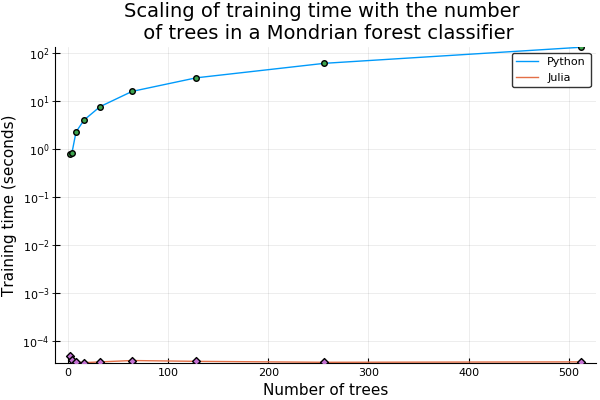

In [13]:
d=5
X, Y, x, y = FakedataClassif(1000,d,100);
Y = Y.+1;
y = y.+1;

time = []
acc = []
trees = []
for j in collect(1:9)
    push!(trees,2^j)
    MF = Mondrian_Forest_Classifier(2^j)
    tic()
    train!(MF,X,Y,1e9)
    t = toq()
    println(t)
    push!(time,t)
    @time pred=predict!(MF, x);
    push!(acc,correctrate(y,convert(Array{Int,1},pred)))
    println(MF.n_trees)
end

println(time)
println(acc)

using CSV
times_py = convert(Array{Float64,1},CSV.read("comparisons/times_py")[2])
pyplot()

plot(trees,times_py,label="Python", yscale=:log10)
plot!(trees,time,label="Julia", yscale=:log10)
scatter!(trees,times_py,label="")
scatter!(trees,time,label="",markershape=:auto)
title!("Scaling of training time with the number \n of trees in a Mondrian forest classifier")
xlabel!("Number of trees")
ylabel!("Training time (seconds)")